<a href="https://colab.research.google.com/github/SainzayaBaasankhuu/Data-Science-Projects/blob/main/COVID-19%20Mobility%20Trends%20in%20the%20NY%20and%20Florida%E3%83%BC%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A8%E3%83%BC%E3%82%AF%E3%81%A8%E3%83%95%E3%83%AD%E3%83%AA%E3%83%80%E3%81%AB%E3%81%8A%E3%81%91%E3%82%8BCOVID-19%E3%81%AE%E7%A7%BB%E5%8B%95%E3%83%88%E3%83%AC%E3%83%B3%E3%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from google.colab import files
import pandas as pd

# Upload the 2020 dataset
print("Upload the 2020 dataset...")
uploaded_2020 = files.upload()
filename_2020 = list(uploaded_2020.keys())[0]
df_2020 = pd.read_csv(filename_2020)

# Upload the 2021 dataset
print("Upload the 2021 dataset...")
uploaded_2021 = files.upload()
filename_2021 = list(uploaded_2021.keys())[0]
df_2021 = pd.read_csv(filename_2021)

Upload the 2020 dataset...


Saving 2020_US_Region_Mobility_Report.csv to 2020_US_Region_Mobility_Report (1).csv
Upload the 2021 dataset...


Saving 2021_US_Region_Mobility_Report.csv to 2021_US_Region_Mobility_Report (1).csv


In [ ]:
# Find common columns
common_columns = list(set(df_2020.columns) & set(df_2021.columns))

# Merge the two datasets
df_combined = pd.concat([df_2020[common_columns], df_2021[common_columns]], ignore_index=True)

# Convert 'date' column to datetime format
df_combined['date'] = pd.to_datetime(df_combined['date'])

# Display first 5 rows
df_combined.head()


# Check the number of rows and columns
print("Shape of the dataframe:", df_combined.shape)

# See all column names
print("\nColumn names:")
print(df_combined.columns.tolist())

# Summary info: non-null counts and data types
print("\nDataFrame info:")
df_combined.info()

Shape of the dataframe: (1764025, 15)

Column names:
['country_region', 'workplaces_percent_change_from_baseline', 'sub_region_2', 'country_region_code', 'residential_percent_change_from_baseline', 'census_fips_code', 'retail_and_recreation_percent_change_from_baseline', 'sub_region_1', 'iso_3166_2_code', 'place_id', 'date', 'parks_percent_change_from_baseline', 'metro_area', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764025 entries, 0 to 1764024
Data columns (total 15 columns):
 #   Column                                              Dtype         
---  ------                                              -----         
 0   country_region                                      object        
 1   workplaces_percent_change_from_baseline             float64       
 2   sub_region_2                                        object        
 3   country_region_code     

In [ ]:
# Filter for New York and Florida
states_to_compare = ["New York", "Florida"]
state_data = df_combined[df_combined['sub_region_1'].isin(states_to_compare)]

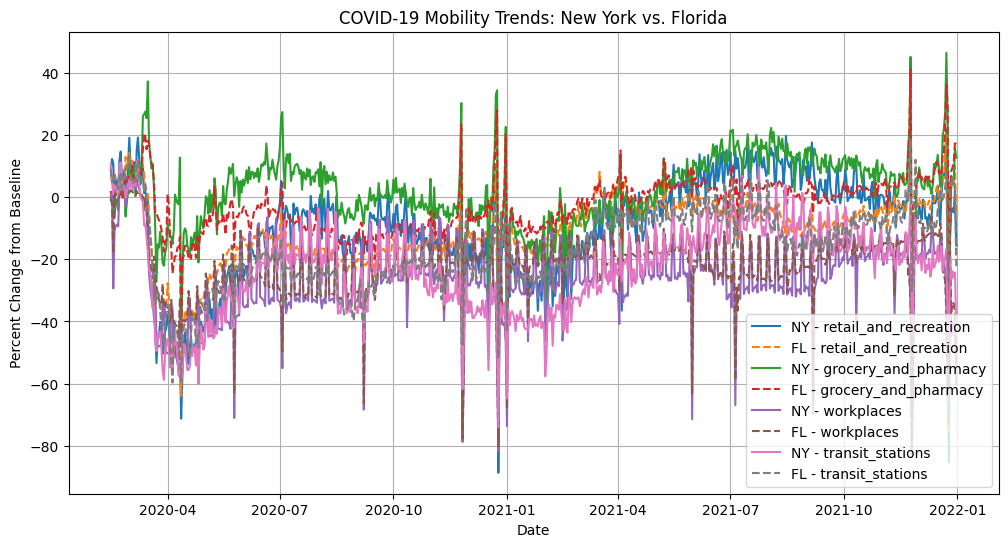

In [ ]:
import matplotlib.pyplot as plt

# Select mobility columns
mobility_cols = [
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline'
]

# Group data by state and date
ny_data = state_data[state_data['sub_region_1'] == "New York"].groupby("date")[mobility_cols].mean()
fl_data = state_data[state_data['sub_region_1'] == "Florida"].groupby("date")[mobility_cols].mean()

# Plot trends
plt.figure(figsize=(12, 6))
for col in mobility_cols:
    plt.plot(ny_data.index, ny_data[col], label=f"NY - {col.split('_percent')[0]}")
    plt.plot(fl_data.index, fl_data[col], linestyle="dashed", label=f"FL - {col.split('_percent')[0]}")

plt.title("COVID-19 Mobility Trends: New York vs. Florida")
plt.xlabel("Date")
plt.ylabel("Percent Change from Baseline")
plt.legend()
plt.grid()
plt.show()

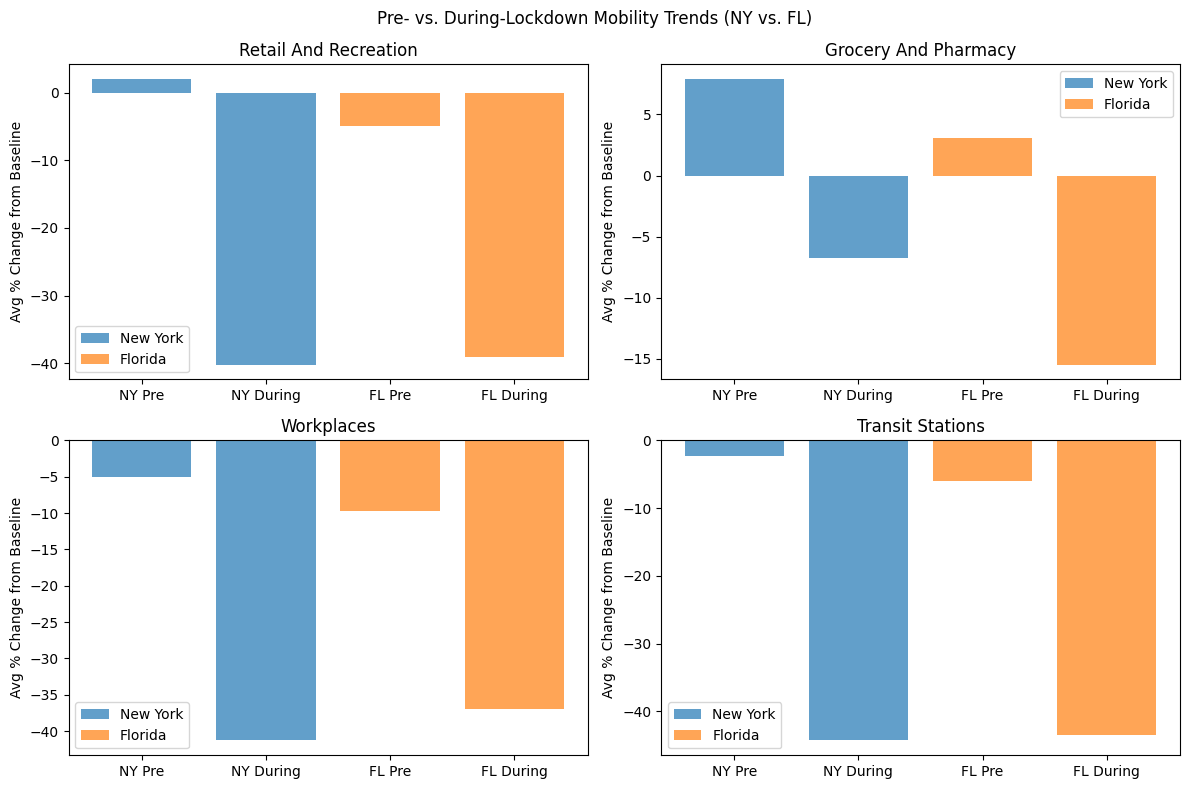

In [ ]:
# Define lockdown boundaries
ny_lockdown_start = pd.to_datetime('2020-03-22')
ny_lockdown_end = pd.to_datetime('2020-06-01')

fl_lockdown_start = pd.to_datetime('2020-04-01')
fl_lockdown_end = pd.to_datetime('2020-05-04')

# Segment data
ny_pre_lockdown = ny_data[ny_data.index < ny_lockdown_start]
ny_during_lockdown = ny_data[(ny_data.index >= ny_lockdown_start) & (ny_data.index <= ny_lockdown_end)]

fl_pre_lockdown = fl_data[fl_data.index < fl_lockdown_start]
fl_during_lockdown = fl_data[(fl_data.index >= fl_lockdown_start) & (fl_data.index <= fl_lockdown_end)]

# Compute averages
ny_pre_avg = ny_pre_lockdown[mobility_cols].mean()
ny_during_avg = ny_during_lockdown[mobility_cols].mean()
fl_pre_avg = fl_pre_lockdown[mobility_cols].mean()
fl_during_avg = fl_during_lockdown[mobility_cols].mean()

# Plot bar comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(mobility_cols):
    ax = axes[i]
    ax.bar(["NY Pre", "NY During"], [ny_pre_avg[col], ny_during_avg[col]], alpha=0.7, label="New York")
    ax.bar(["FL Pre", "FL During"], [fl_pre_avg[col], fl_during_avg[col]], alpha=0.7, label="Florida")
    ax.set_title(col.replace("_percent_change_from_baseline", "").replace("_", " ").title())
    ax.set_ylabel("Avg % Change from Baseline")
    ax.legend()

plt.suptitle("Pre- vs. During-Lockdown Mobility Trends (NY vs. FL)")
plt.tight_layout()
plt.show()

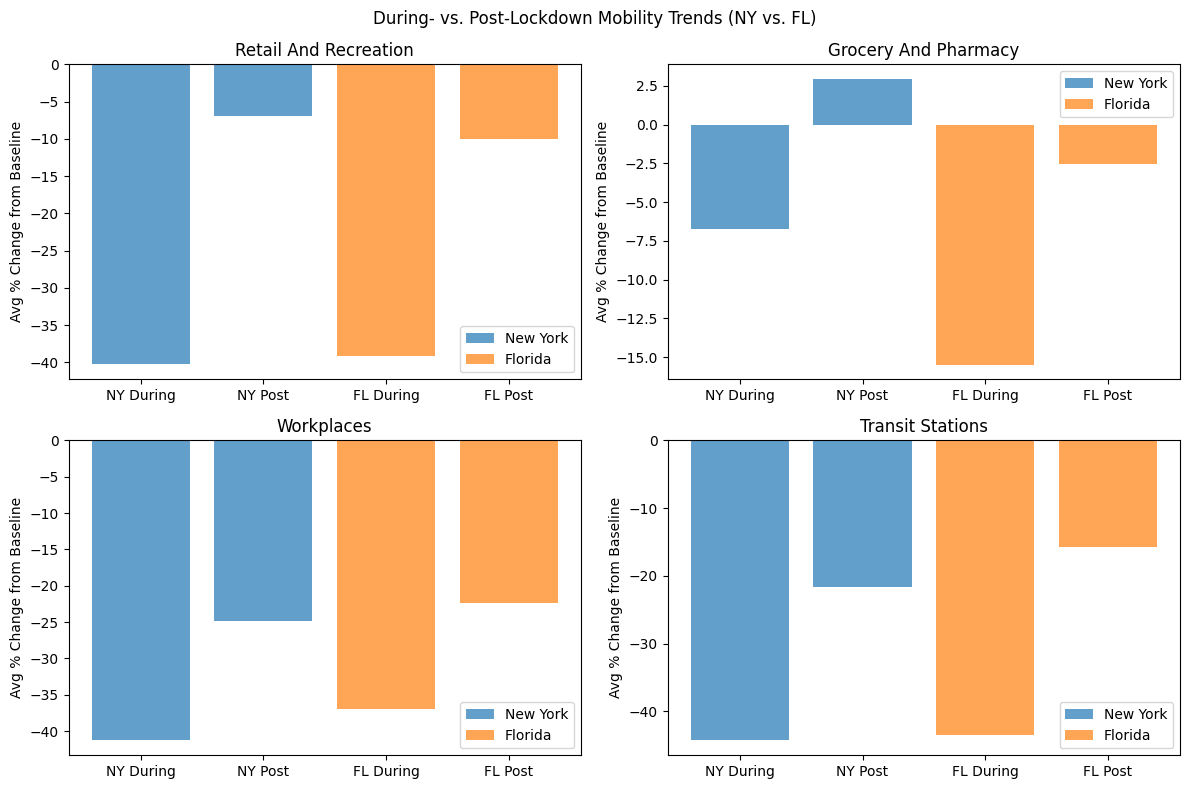

In [ ]:
# Define lockdown boundaries
ny_lockdown_start = pd.to_datetime('2020-03-22')
ny_lockdown_end = pd.to_datetime('2020-06-01')

fl_lockdown_start = pd.to_datetime('2020-04-01')
fl_lockdown_end = pd.to_datetime('2020-05-04')

# Segment data
ny_during_lockdown = ny_data[(ny_data.index >= ny_lockdown_start) & (ny_data.index <= ny_lockdown_end)]
ny_post_lockdown = ny_data[ny_data.index > ny_lockdown_end]

fl_during_lockdown = fl_data[(fl_data.index >= fl_lockdown_start) & (fl_data.index <= fl_lockdown_end)]
fl_post_lockdown = fl_data[fl_data.index > fl_lockdown_end]

# Compute averages
ny_during_avg = ny_during_lockdown[mobility_cols].mean()
ny_post_avg = ny_post_lockdown[mobility_cols].mean()
fl_during_avg = fl_during_lockdown[mobility_cols].mean()
fl_post_avg = fl_post_lockdown[mobility_cols].mean()

# Plot bar comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(mobility_cols):
    ax = axes[i]
    ax.bar(["NY During", "NY Post"], [ny_during_avg[col], ny_post_avg[col]], alpha=0.7, label="New York")
    ax.bar(["FL During", "FL Post"], [fl_during_avg[col], fl_post_avg[col]], alpha=0.7, label="Florida")
    ax.set_title(col.replace("_percent_change_from_baseline", "").replace("_", " ").title())
    ax.set_ylabel("Avg % Change from Baseline")
    ax.legend()

plt.suptitle("During- vs. Post-Lockdown Mobility Trends (NY vs. FL)")
plt.tight_layout()
plt.show()

興味深いパターン: ニューヨークとフロリダは、特に食料品店や薬局のトレンドにおいて顕著な違いを見せています。調べた結果、フロリダは共和党の州であり、ニューヨークと同じように厳格なCOVID-19の規制（ロックダウンやマスク義務など）を施行しなかったことがわかりました。このアプローチにより、パンデミック中のフロリダでは食料品店や薬局の訪問が顕著に減少しました。

この理由の一つとして、特に保守的な地域に住む多くのフロリダ州民がCOVID-19の深刻さを完全には信じていなかった、あるいは予防措置を取る必要を感じていなかったことが考えられます。そのため、彼らは自分の健康についてあまり心配しておらず、その結果、食料品店や薬局といった必要な店舗への訪問が少なくなったのかもしれません。ウイルスに対する緊急性の認識が不足していたため、オンラインでの食料品購入や非接触サービスのような新しい習慣を取り入れることに対しても、あまり積極的ではなかったと考えられます。

一方、ニューヨーカーはパンデミック中、健康に対して非常に意識が高かったと言えます。これは、厳格な規制と公衆衛生に関するより集団的な考え方に起因しています。健康と安全が最優先され、多くのニューヨーカーはマスク着用義務や社会的距離のルール、政府の制限に積極的に従っていました。これらの規制は、人々が予防措置を取る環境を作り、結果として食料品店や薬局に定期的に訪れることが続きました。もちろん、より慎重に、そして安全対策を守りながらではありましたが。

---

Interesting pattern: New York and Florida have shown stark differences, especially in grocery and pharmacy trends. Upon examining, I found that Florida is a Republican (political party) state which didn’t enforce strict COVID-19 regulations, including lockdowns or mask mandates, in the same way New York did. This approach led to a noticeable reduction in grocery and pharmacy visits in Florida during the pandemic.

One possible reason for this is that many Floridians, particularly in conservative areas, didn't fully believe in the severity of COVID-19 or perhaps didn’t feel the need to take precautions. As a result, they may not have been as concerned about their health, which led to fewer visits to essential stores like grocery and pharmacy outlets. The lack of perceived urgency around the virus might also have made people less inclined to adopt new habits like online grocery shopping or contactless services, even as the virus continued to spread.

In contrast, New Yorkers were much more health-conscious during the pandemic, largely due to stricter regulations and a more collective mindset regarding public health. Health and safety were prioritized, with many New Yorkers actively adhering to mask mandates, social distancing rules, and government-imposed restrictions. These regulations created an environment where people were more likely to take preventative measures and thus, continued to visit grocery stores and pharmacies regularly, albeit with more caution and adherence to safety protocols.